# Fitting the Fibonacci Series


* [Jupyter notebooks](https://jupyter.org/)
* [matplotlib](https://matplotlib.org/tutorials/introductory/usage.html)

Jim Mahoney | MIT License | Jan 2019 | cs.marlboro.college

In [1]:
# My standard numerical work imports.
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

## a sample plot

Here's an example of how to make a labeled plot of a curve and some points.

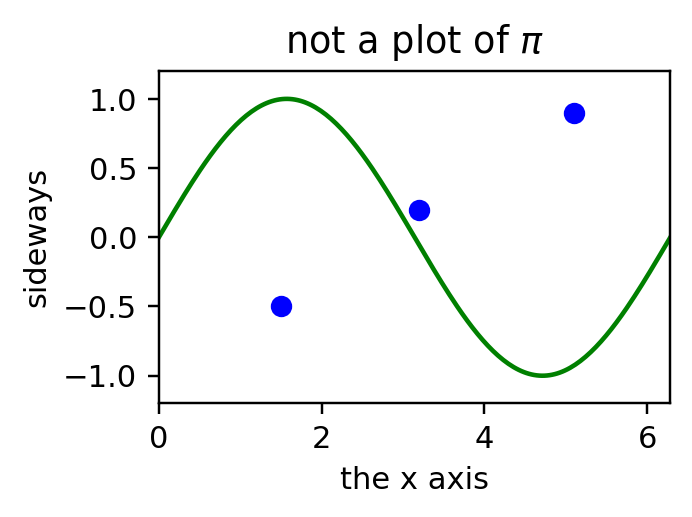

In [2]:
# Points are stored as two arrays, [x1, x2, x3, ...] and [y1, y2, y3, ...].
points_x = [1.5, 3.2, 5.1]
points_y = [-0.5, 0.2, 0.9]

# Curves are just closely spaces points.
x = np.linspace(0, 2*pi, 200)  # 200 points from 0 to 2*pi ; a numpy.ndarray
y = sin(x)                     # numpy's sin() : take the sine of each

# Set up the plot with successive commands.

figure = plt.figure(dpi=220, figsize=(3, 2))   # dots_per_inch and (width, height) in inches
axis = figure.add_subplot(111)                 # 111 indicates (rows,cols,number) i.e. 1x1 #1 .
axis.set(xlabel="the x axis", ylabel="sideways", title="not a plot of $\pi$")
axis.set_xlim((0, 2*pi))  # i.e. xlimits=(0,10)
axis.set_ylim((-1.2, 1.2))    # 

axis.plot(points_x, points_y, marker="o", color="blue", linestyle="none")
axis.plot(x, y, color="green")
plt.show()

# See all the details at
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html?highlight=plot#matplotlib.axes.Axes.plot

## Fib on a log scale

Generate a bunch of fibonacci values and plot 'em on a log scale.

In [3]:
n = 100                # how many fibonnaci values
fib = [None] * n       # set up an array to hold 'em.
fib[0] = 1
fib[1] = 1
for i in range(2, n):
    fib[i] = fib[i-1] + fib[i-2]
str(fib)

'[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 679891637638612258, 11000877783

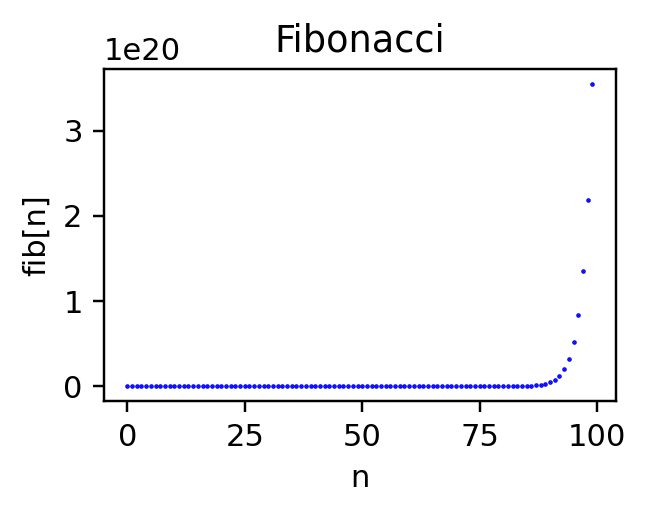

In [4]:
# Here's what they look like.

figure = plt.figure(dpi=220, figsize=(3, 2))   # dots_per_inch and (width, height) in inches
axis = figure.add_subplot(111)                 # 111 indicates (rows,cols,number) i.e. 1x1 #1 .
axis.set(xlabel="n", ylabel="fib[n]", title="Fibonacci")
axis.plot(range(n), fib, marker=".", markersize=1.0, color="blue", linestyle="none")
plt.show()

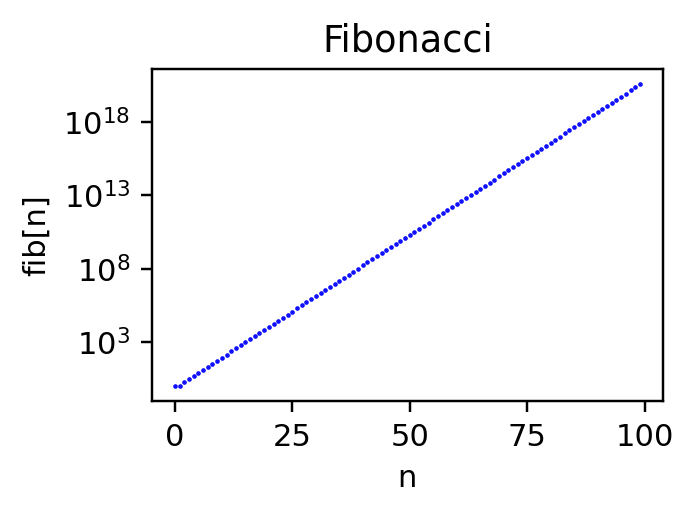

In [5]:
# Much more revealing is to take the log() of the y values
# .. or to plot with log scaling, which amounts to the same thing visually.
# google "matplotlib log"

figure = plt.figure(dpi=220, figsize=(3, 2))   # dots_per_inch and (width, height) in inches
axis = figure.add_subplot(111)                 # 111 indicates (rows,cols,number) i.e. 1x1 #1 .
axis.set(xlabel="n", ylabel="fib[n]", title="Fibonacci")
axis.plot(range(n), fib, marker=".", markersize=1.0, color="blue", linestyle="none")
plt.yscale('log')
plt.show()

So on a log scale, the Fibonacci series is a straight line ... which means that it is a power law, approximately fib[n] ~ $a * b^n$ for some constants $a$ and $b$.

It turns out that $b$ is the golden ratio $k = 1.62... $

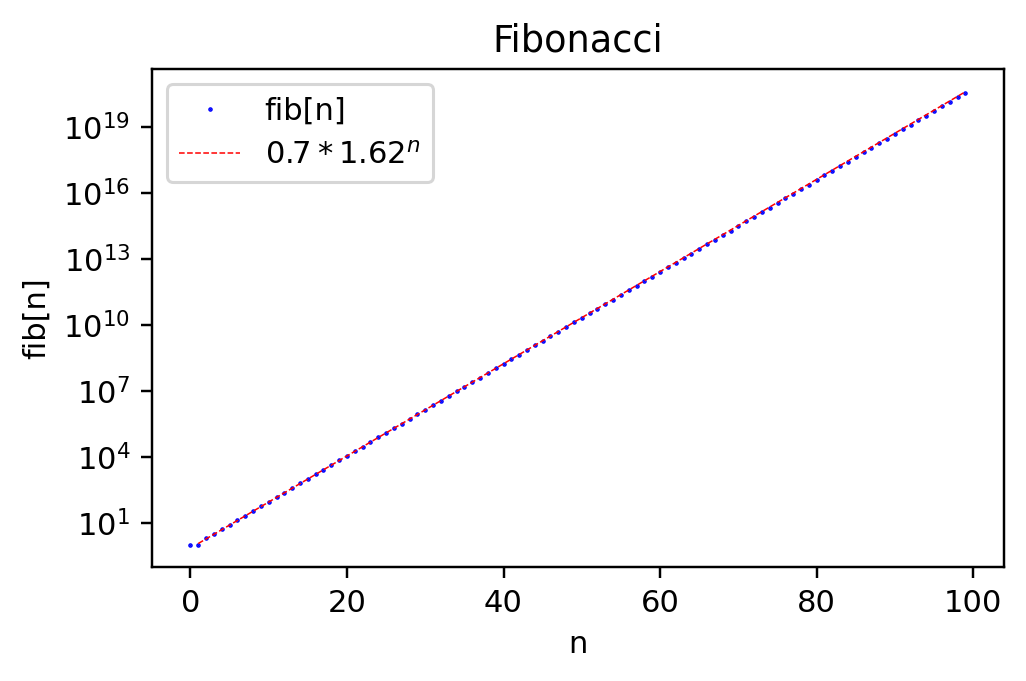

In [6]:

ns = np.array(range(1,n))  # The ns should be a numpy array for the arithmetic below to work.

a = 0.7
b = 1.62
ys = a * b ** ns           # The power law that we're approximating.

figure = plt.figure(dpi=220, figsize=(5, 3))   # dots_per_inch and (width, height) in inches
axis = figure.add_subplot(111)                 # 111 indicates (rows,cols,number) i.e. 1x1 #1 .
axis.set(xlabel="n", ylabel="fib[n]", title="Fibonacci")
axis.plot(range(n), fib, marker=".", markersize=1.0, color="blue", linestyle="none", label="fib[n]")
axis.plot(ns, ys, color="red", linewidth=0.5, linestyle="dashed", label="${}*{}^n$".format(a,b))
axis.legend()
plt.yscale('log')
plt.show()


For a really good time we can even use [xkcd style](https://jakevdp.github.io/blog/2013/07/10/XKCD-plots-in-matplotlib/) !

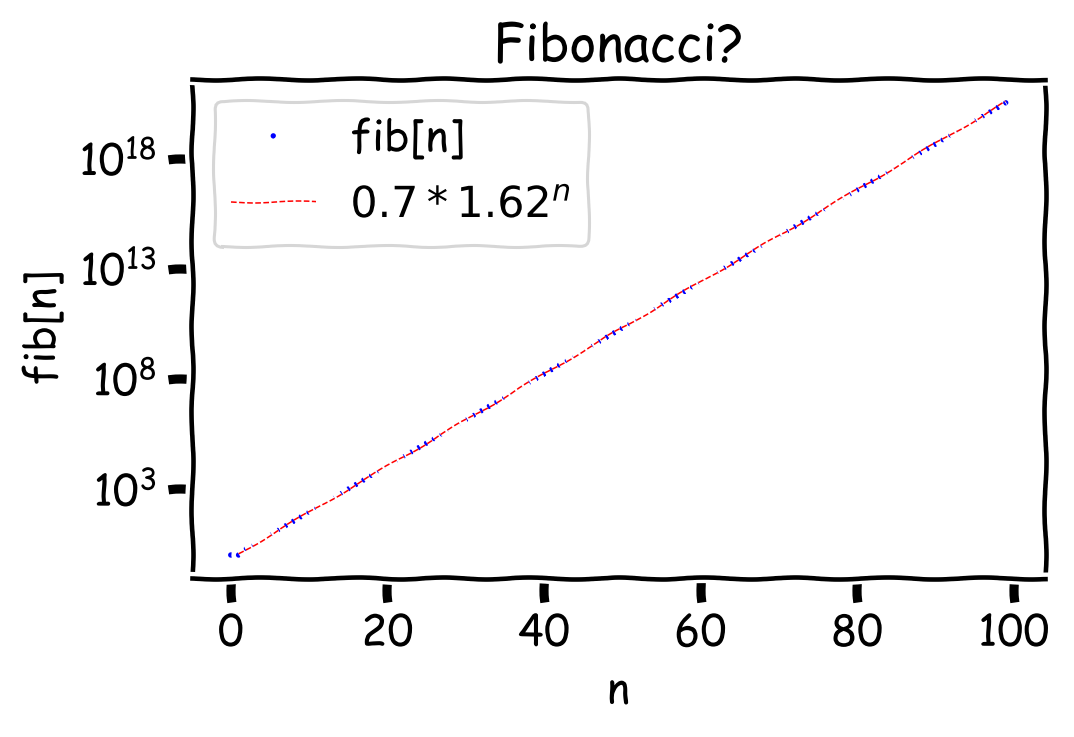

In [7]:

with plt.xkcd():
    figure = plt.figure(dpi=220, figsize=(5, 3))   # dots_per_inch and (width, height) in inches
    axis = figure.add_subplot(111)                 # 111 indicates (rows,cols,number) i.e. 1x1 #1 .
    axis.set(xlabel="n", ylabel="fib[n]", title="Fibonacci?")
    axis.plot(range(n), fib, marker=".", markersize=1.0, color="blue", linestyle="none", label="fib[n]")
    axis.plot(ns, ys, color="red", linewidth=0.5, linestyle="dashed", label="${}*{}^n$".format(a,b))
    axis.legend()
    plt.yscale('log')
    plt.show()

OK, so *now* we're having fun. :)